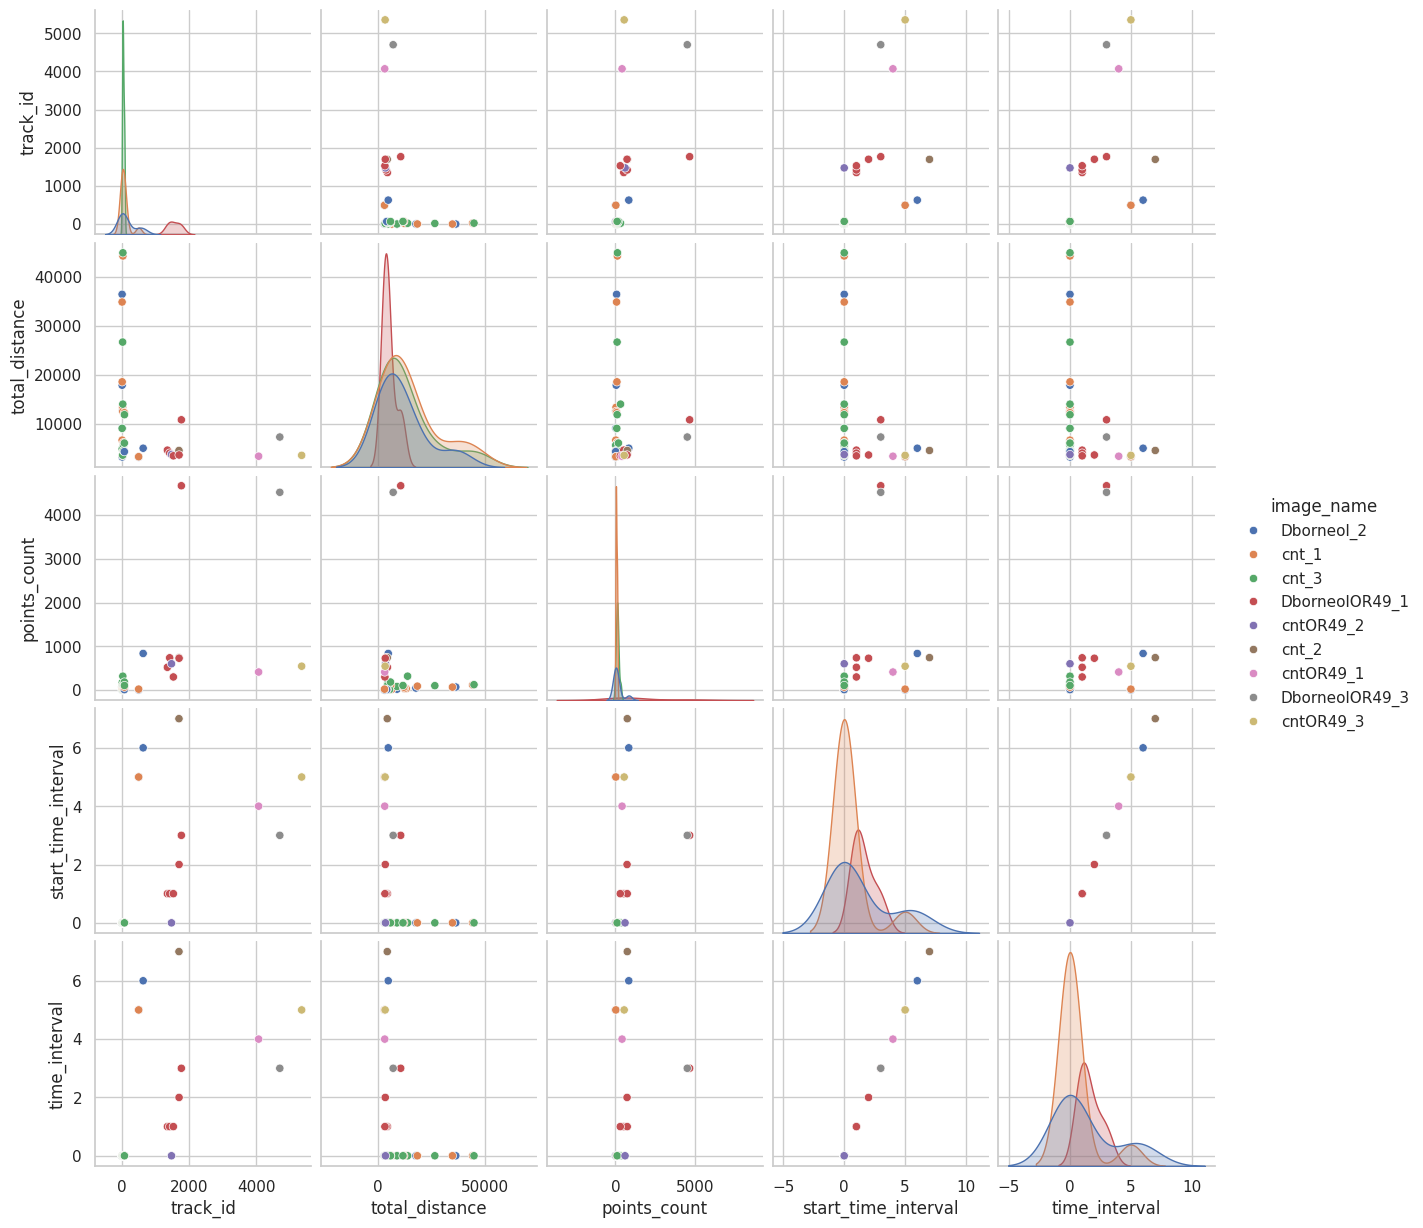

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load a sample of your large CSV
csv = "/home/bohbot/workspace/project/23.04/claude/distance_traveled_data.csv"
df = pd.read_csv(csv)
nrows=np.size(df, 0)
# Drop missing values
df = df.dropna(subset=["total_distance"])
df = df[df["total_distance"] >= 5]
df = df[df["total_distance"] >= 3000]
sns.pairplot(df, hue="image_name")

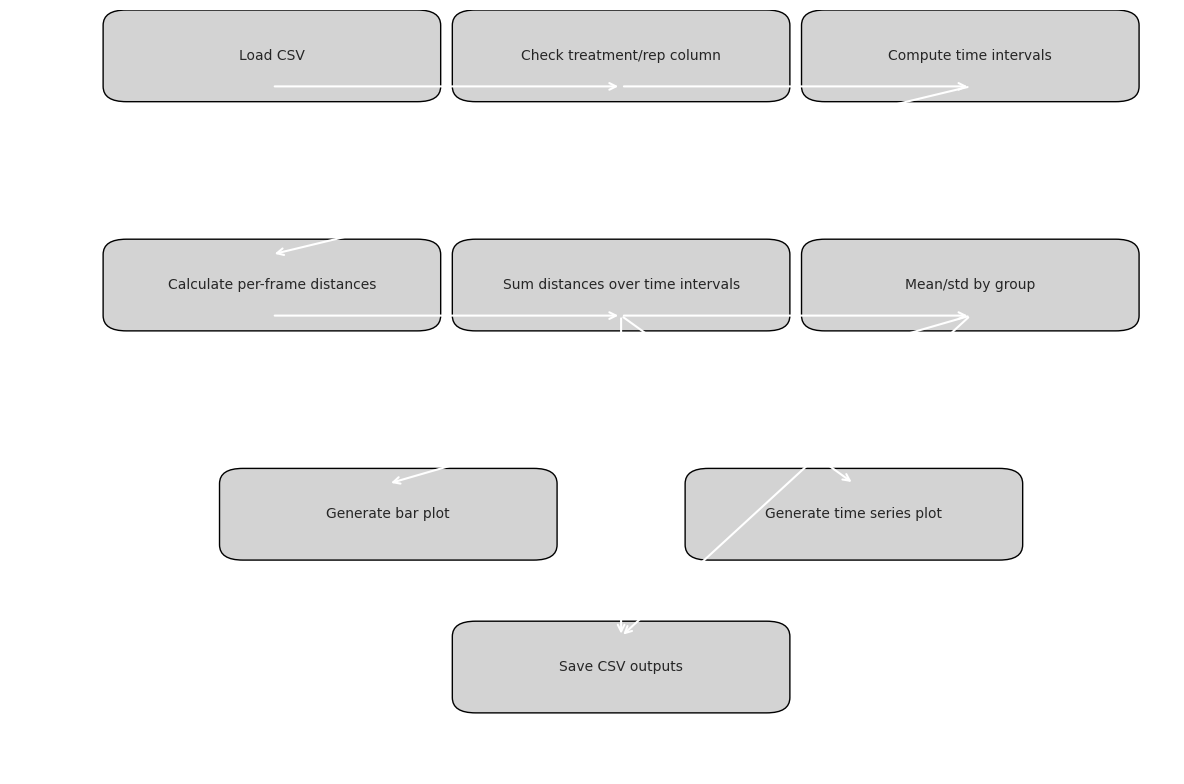

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Create a simple flowchart-style diagram to visualize the logic

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")

# Define boxes with (x, y) positions and labels
steps = {
    "load": ("Load CSV", (0.1, 0.9)),
    "validate": ("Check treatment/rep column", (0.4, 0.9)),
    "time_int": ("Compute time intervals", (0.7, 0.9)),
    "distance": ("Calculate per-frame distances", (0.1, 0.6)),
    "aggregate": ("Sum distances over time intervals", (0.4, 0.6)),
    "summary": ("Mean/std by group", (0.7, 0.6)),
    "barplot": ("Generate bar plot", (0.2, 0.3)),
    "timeplot": ("Generate time series plot", (0.6, 0.3)),
    "save": ("Save CSV outputs", (0.4, 0.1)),
}

# Draw the boxes
for label, (text, (x, y)) in steps.items():
    ax.add_patch(mpatches.FancyBboxPatch((x, y), 0.25, 0.08,
                                         boxstyle="round,pad=0.02",
                                         edgecolor="black", facecolor="#D3D3D3"))
    ax.text(x + 0.125, y + 0.04, text, ha="center", va="center", fontsize=10)

# Draw arrows
connections = [
    ("load", "validate"), ("validate", "time_int"), ("time_int", "distance"),
    ("distance", "aggregate"), ("aggregate", "summary"),
    ("summary", "barplot"), ("aggregate", "timeplot"),
    ("summary", "save"), ("aggregate", "save")
]

for src, dst in connections:
    _, (x1, y1) = steps[src]
    _, (x2, y2) = steps[dst]
    ax.annotate("",
                xy=(x2 + 0.125, y2 + 0.08 if y2 < y1 else y2),
                xytext=(x1 + 0.125, y1),
                arrowprops=dict(arrowstyle="->", lw=1.5))

plt.tight_layout()
plt.show()


In [4]:
import cv2

def retimestamp_to_24fps(input_path, output_path, output_fps=24):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        raise IOError("Could not open input video")

    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, output_fps, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)  # write each source frame once

    cap.release()
    out.release()
    print(f"Done: {output_path}")

# Example:
# 3 → 24 fps (8× speed-up)
retimestamp_to_24fps("/home/bohbot/workspace/images/albo_date/2025-05-14_10-14-56_cam2.mp4", "/home/bohbot/workspace/images/albo_date/24_2025-05-14_10-14-56_cam2.mp4", output_fps=24)


Done: /home/bohbot/workspace/images/albo_date/24_2025-05-14_10-14-56_cam2.mp4
